# CATS AND DOGS CLASSIFICATION USING KERAS

References:

https://www.youtube.com/watch?v=qFJeN9V1ZsI&t=6036s
https://github.com/thepghimire/LearningKeras/blob/master/Image%20preparation%20for%20CNN%20using%20Keras.ipynb (Modified)

CNN 3D Visualization : https://www.youtube.com/watch?v=f0t-OCG79-U

Another Sweet Video : https://www.youtube.com/watch?v=3JQ3hYko51Y

How convolutional neural networks see the world:
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Setup

in current directory, images are present in data/cats-and-dogs

In [2]:
# os.chdir("../../")
# print("Current directory = "+os.getcwd())

In [3]:
# Train, Validation and test sets:
os.chdir('data/cats-and-dogs')
print("Current directory = "+os.getcwd())
if os.path.isdir('train/dog') is False:
    
    print("Creating directories")
    
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    print("Copying Files...")
    
    for c in random.sample(glob.glob('cat*'), 50):   # glob function finds the files matching the pattern given in bracket
        shutil.copy(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.copy(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 10):
        shutil.copy(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 10):
        shutil.copy(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 5):
        shutil.copy(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 5):
        shutil.copy(c, 'test/dog')
        
    print("Done copying Files...")

os.chdir("../../")    
print("Back to directory = "+os.getcwd())

Current directory = C:\Users\anandhukrishnan.v\Desktop\DeepLizard\Keras-Machine-Learning-Deep-Learning-Tutorial\data\cats-and-dogs
Back to directory = C:\Users\anandhukrishnan.v\Desktop\DeepLizard\Keras-Machine-Learning-Deep-Learning-Tutorial


## Prepare train,validation and test sets

In [4]:
train_path = 'data/cats-and-dogs/train'
valid_path = 'data/cats-and-dogs/valid'
test_path = 'data/cats-and-dogs/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [6]:
assert train_batches.n == 100
assert valid_batches.n == 20
assert test_batches.n == 10
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

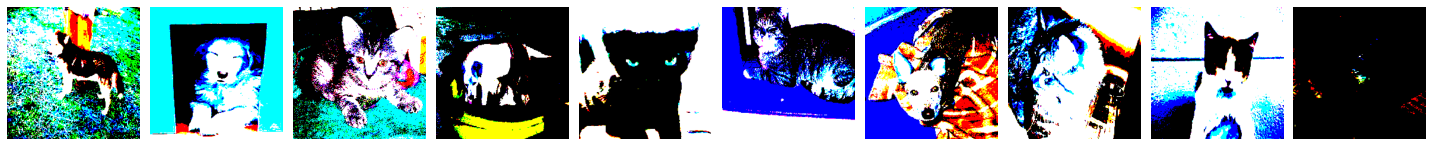

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [7]:
# plot images in grid form with 1 row, 10 columns where images are placed 
# This function is directly from tensoflow website
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

## Build the CNN Model

In [8]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2,2),strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2),strides=2),
        Flatten(), #Convert data into a 1-dimensional. We flatten the output of the convolutional layers to create a single long feature vector that is fed to next layer
        Dense(2, activation='softmax'),
    ])


model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#NOTES

#kernal_size : this is how we can set filter size 3*3 in keras
#padding=same means, pad 0's to the edge of input so that the layer outputs the same input size (see the ouput size of layer in summary)
#  padding=valid means no padding(default even if we didnt specify)
#max pool - same as filter, here call it pool (2*2 grid), moves in steps of 2 pixes (srtides) to get the max values of that 2*2 grid
#2*2 with stride 2 will make size half!(see output shape in summary)
# why needed ? 
# https://www.youtube.com/watch?v=ZjM_XQa5s6s&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU&index=22
#     6:9


#softmax function -The softmax function is a function that turns a vector of K real values into a vector of K real values
# that sum to 1. The input values can be positive, negative, zero, or greater than one, 
# but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

## TRAIN!

In [9]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

# wer are not specifying y bcz we store data as generator (guess the same for batch size also)

Epoch 1/10
10/10 - 6s - loss: 54.6087 - accuracy: 0.5800 - val_loss: 76.0701 - val_accuracy: 0.5000
Epoch 2/10
10/10 - 5s - loss: 49.1113 - accuracy: 0.5300 - val_loss: 54.0712 - val_accuracy: 0.5000
Epoch 3/10
10/10 - 5s - loss: 22.2035 - accuracy: 0.5900 - val_loss: 21.6761 - val_accuracy: 0.5500
Epoch 4/10
10/10 - 5s - loss: 9.4408 - accuracy: 0.7800 - val_loss: 21.2299 - val_accuracy: 0.5000
Epoch 5/10
10/10 - 5s - loss: 4.7395 - accuracy: 0.8300 - val_loss: 19.7064 - val_accuracy: 0.5500
Epoch 6/10
10/10 - 5s - loss: 4.7564 - accuracy: 0.8000 - val_loss: 35.5356 - val_accuracy: 0.5000
Epoch 7/10
10/10 - 6s - loss: 2.8136 - accuracy: 0.8600 - val_loss: 15.1070 - val_accuracy: 0.5500
Epoch 8/10
10/10 - 5s - loss: 0.9526 - accuracy: 0.9500 - val_loss: 15.5820 - val_accuracy: 0.6000
Epoch 9/10
10/10 - 5s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 13.8409 - val_accuracy: 0.5500
Epoch 10/10
10/10 - 5s - loss: 4.8876e-08 - accuracy: 1.0000 - val_loss: 14.3193 - val_accuracy: 0.5000


# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

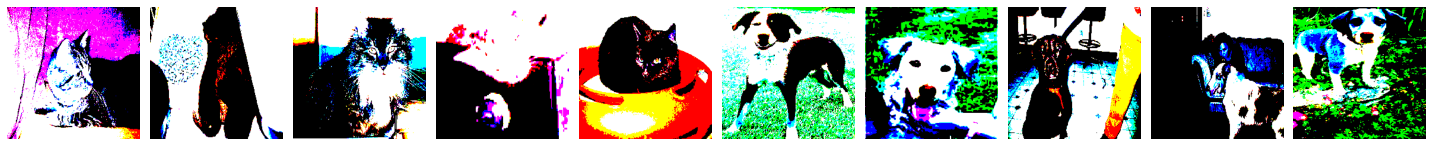

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [11]:
test_batches.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [12]:
predictions = model.predict(test_batches, verbose=0)

In [13]:
predictions
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## Confusion Matrix

In [14]:
#Expected and Actual (printed so i can just check if my confusion matrix is correct)
print(test_batches.classes)
print(np.argmax(predictions,axis=-1))

#Pass them to confusion matrix
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

[0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 1 1 1 0 0 1]


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[4 1]
 [2 3]]


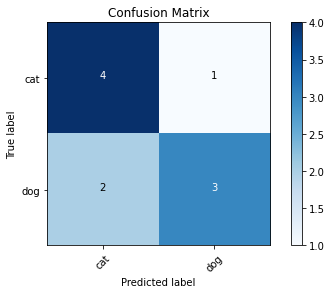

In [17]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

###### Our above model obviously overfits.. damn!

# CATS AND DOGS CLASSIFICATION USING KERAS - FINE TUNE EXISTING MODEL VGG16
This model is already trained with data 'including cats and dogs' , later we will do with completely new data

## Import model

In [18]:
vgg16_model = tf.keras.applications.vgg16.VGG16() # Will download the entire model on first run (above 500MB)
vgg16_model.summary()
type(vgg16_model) # Displays the type of model. This is not sequential model(Earlier we did Sequential Models)

553467904/553467096 [==============================] - 280s 1us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

tensorflow.python.keras.engine.functional.Functional

## Convert it into Sequential Model

In [19]:
## Loop through evey layer except last one and add it to our sequential model
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

# Guess otherwise we can use model.layers.pop() to remove one layer(need to confirm)    

In [20]:
model.summary()   # Compare the summaries(this wont have last layer)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [21]:
#Freeze the layers to prevent them changing
for layer in model.layers:
    layer.trainable = False

In [22]:
model.add(Dense(2, activation='softmax'))

In [23]:
model.summary() #Check the new layer and also trainable params count

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Train the fine-tuned VGG16 model

In [24]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=5, verbose=2)

Epoch 1/5
10/10 - 34s - loss: 1.0263 - accuracy: 0.4800 - val_loss: 1.0383 - val_accuracy: 0.6000
Epoch 2/5
10/10 - 36s - loss: 0.5405 - accuracy: 0.7400 - val_loss: 0.7110 - val_accuracy: 0.7500
Epoch 3/5
10/10 - 52s - loss: 0.3178 - accuracy: 0.8900 - val_loss: 0.5656 - val_accuracy: 0.8000
Epoch 4/5
10/10 - 39s - loss: 0.2133 - accuracy: 0.9200 - val_loss: 0.5226 - val_accuracy: 0.8000
Epoch 5/5
10/10 - 33s - loss: 0.1507 - accuracy: 0.9600 - val_loss: 0.4796 - val_accuracy: 0.8000


This was already here(needs investigation) :

If saving this model with model.save('file.h5'), note that some users have reported the following error when loading the model using load_model('file.h5'):
    
ValueError: Dimension 0 in both shapes must be equal, but are 4096 and 1000.
Shapes are [4096,10] and [1000,10]. for 'Assign_61' (op: 'Assign') with input shapes: [4096,10], [1000,10].
   
If you receive this error, please see the answer in this stackoverflow post:
https://stackoverflow.com/questions/48482483/valueerror-when-loading-a-previously-saved-retrained-vgg16-model-using-keras

## Predict using fine-tuned VGG16 model

In [26]:
predictions = model.predict(x=test_batches,verbose=0)

In [27]:
print(test_batches.classes)
print(np.argmax(predictions,axis=-1))
test_batches.class_indices

#Pass them to confusion matrix
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

[0 0 0 0 0 1 1 1 1 1]
[0 1 0 0 1 1 1 1 1 1]


Confusion matrix, without normalization
[[3 2]
 [0 5]]


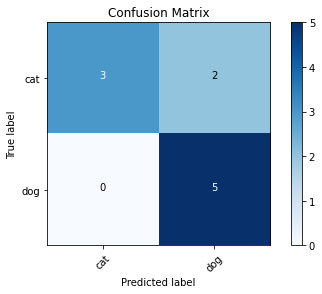

In [28]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')